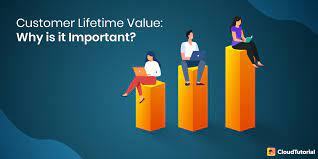



# **Customer Lifetime Value (CLTV) Prediction Project**

# **Introduction**

In today's data-driven business landscape, understanding and predicting customer behavior is of paramount importance. One key metric that assists businesses in assessing customer value and making informed decisions is Customer Lifetime Value (CLTV). CLTV represents the total revenue a business can expect from a customer throughout their entire relationship.

For this project, we explore the calculation of CLTV using a retail dataset. The dataset contains information about customer transactions, including recency, frequency, and monetary value (RFM). These three RFM components serve as the foundation for predicting the CLTV of each customer. Here's a brief overview of the dataset:

a. Recency (R): This metric measures how recently a customer made a purchase. It is typically defined as the time elapsed since the customer's last purchase.

b. Frequency (F): Frequency represents the number of purchases made by a customer within a specified time period. It reflects customer engagement and loyalty.

c. Monetary (M): Monetary value signifies the total amount of money spent by a customer on purchases. It provides insights into the customer's spending habits.

Our goal in this project is to utilize these RFM metrics to predict CLTV. To achieve this, we follow these steps:

1. Calculate the average order value for each customer by dividing monetary value by frequency.

2. Compute the total purchase frequency, which represents the collective purchasing behavior of all customers.

3. Determine the purchase frequency per customer, revealing the average number of transactions a typical customer makes.

4. Analyze the repeat rate, indicating the percentage of customers who make more than one purchase.

5. Calculate the churn rate, which represents the rate at which customers stop making purchases.

6. Introduce a profit margin assumption (e.g., 20%) to calculate the profit margin for each customer.

7. Finally, estimate the CLTV for each customer using the formula: avg_order_value * purchase_frequency / churn_rate.

# **Model Selection**

To predict CLTV, various approaches can be considered, including statistical models, machine learning algorithms, and customer segmentation techniques. The choice of model depends on the specific goals and characteristics of the dataset. In this project, we have opted for a straightforward calculation-based approach rather than a predictive model, as the goal is to estimate CLTV based on existing transaction data.



## Clustering: Grouping the customer----Buying Pattern
1. **Recency,Frequency,Monetary** : This step involves segmenting customers based on their purchase history, specifically how recently they made a purchase (Recency), how often they make purchases (Frequency), and how much money they spend (Monetary).

2. **Identify the business trend** : Analyzing business trends based on day, month, season, and timing can provide insights into peak shopping times and seasons, helping businesses to optimize their sales and marketing efforts.

3. **Recommendation Engine** : This involves developing a system that can recommend products or services to customers based on their past purchases and preferences.

4. **Life time valuation of the customer** : This step involves calculating the lifetime value of each customer, as explained in the introduction.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Loading and Exploration


In [ ]:
original_data=pd.read_excel("Online_shopping.xlsx")

In [ ]:
df=original_data.copy()

In [ ]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Based on the dataset's first five rows:

Essential columns for RFM analysis are CustomerID, InvoiceDate, Quantity, and UnitPrice.
We'll calculate Recency, Frequency, and Monetary values for each customer using this data.

# Exploratory Data Analysis: Customer Distribution by Country


In [ ]:
df["Country"].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

The output shows that a majority of the customers are from the United Kingdom (91.43%), followed by Germany (1.75%), France (1.58%), and EIRE (1.51%). Other countries have significantly fewer customers in comparison. This insight can be useful for targeted marketing campaigns or personalized customer engagement strategies.

# Data Cleaning


In [ ]:
df1=df.drop(["StockCode","lower","Description","Country"],axis=1)
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


This leaves us with the columns 'InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice', and 'CustomerID', which are essential for calculating RFM metrics. The output shows the first five rows of the cleaned data.


# Handling Missing

In [ ]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

The 'CustomerID' field has many missing values because some customers chose not to disclose their identities.

In [ ]:
df1.dropna(axis=0,inplace=True)

In [ ]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

we addressed the missing 'CustomerID' values by removing rows with missing data, as imputation was not appropriate for this unique identifier. This step ensures the accuracy of our analysis while respecting customer privacy.

# Understanding Descriptive Statistics of the Data


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


Quantity: The minimum value is -80995, which indicates a refund or defective item.

UnitPrice: The minimum value is 0, which suggests that some items were given for free.

This summary provides a quick overview of key statistics and helps to identify any anomalies or patterns in the data that may require further investigation.

# Removing Negative Quantities and Handling Zero UnitPrice


In [ ]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


From the output, we observe that some items have a UnitPrice of 0.0, indicating they were given for free or as part of a promotion.



In [ ]:
# we removed the rows with negative quantities as they represent refunds or defective items.
df1=df1[df1["Quantity"]>0]

In [ ]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Post removal, the descriptive statistics of the data are as follows:

Quantity: Minimum value is now 1, indicating no more negative or zero quantities.

UnitPrice: Minimum value is still 0, as there can be items with zero price due to promotions or being free.


In [ ]:
df1.head(20)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
5,536365,2,2010-12-01 08:26:00,7.65,17850.0
6,536365,6,2010-12-01 08:26:00,4.25,17850.0
7,536366,6,2010-12-01 08:28:00,1.85,17850.0
8,536366,6,2010-12-01 08:28:00,1.85,17850.0
9,536367,32,2010-12-01 08:34:00,1.69,13047.0


The displayed data gives a clear snapshot of the transactions made. We can observe:

1. Multiple transactions can be grouped by 'InvoiceNo' and 'CustomerID' since the same customer could purchase various items in a single transaction.
2. 'Quantity' and 'UnitPrice' give details about each item purchased in the transaction.
3. 'InvoiceDate' records the time of purchase.

In [ ]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [ ]:
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


By creating the "Total" column, we now have a clear and direct measure of the revenue generated from each item in a transaction, which is essential for sales analysis. This new feature can be utilized in future analyses to better understand customer purchasing patterns and preferences.

# Simplify the Dataset by Dropping Unnecessary Columns






In [ ]:
df2=df1.drop(['Quantity','UnitPrice'],axis=1)

In [ ]:
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


By dropping the 'Quantity' and 'UnitPrice' columns, we have simplified our dataset while retaining all necessary information for future analysis, as the 'Total' column provides a direct measure of revenue. This cleaner dataset will facilitate easier and more efficient data manipulation and analysis going forward.

# Summarize the Dataset by Grouping and Aggregating



In [ ]:
df_final =df2.groupby(['InvoiceNo','InvoiceDate','CustomerID']).agg({"Total":"sum"}).reset_index()

In [ ]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


The dataset has been simplified by grouping the transactions and calculating the total value per invoice. This step is crucial for better analysis and visualization of the data.

# Outliers Detection

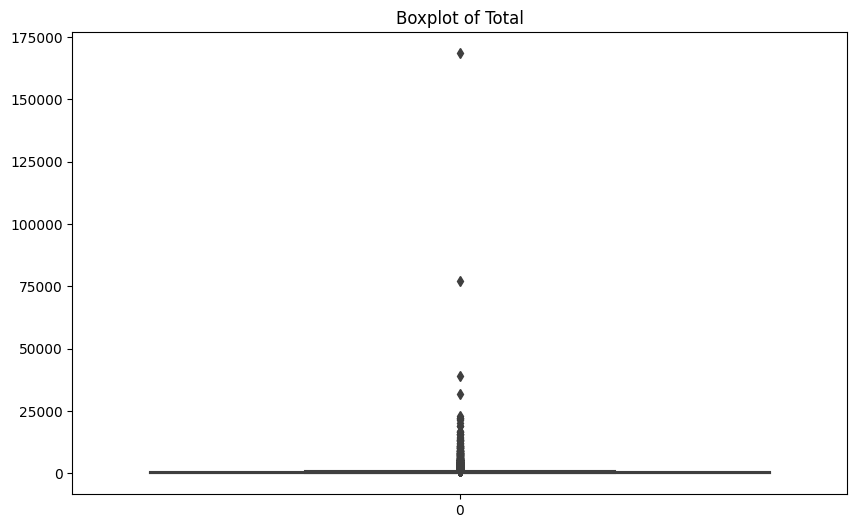

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(10,6))
sns.boxplot(df_final['Total'])
plt.title('Boxplot of Total')
plt.show()


Before proceeding with CLV calculations, consider investigating the reason for these outliers. Are they due to large bulk orders, specific events, or data errors? Once the cause is identified, decisions can be made on whether to adjust, remove, or retain these data points. If the outliers are genuine transactions, consider using robust statistical measures (e.g., median) that are not influenced by outliers, or use techniques that can account for these outliers when calculating CLV.

In [ ]:
# Calculate IQR
Q1 = df_final['Total'].quantile(0.25)
Q3 = df_final['Total'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_final[(df_final['Total'] < lower_bound) | (df_final['Total'] > upper_bound)]



In [ ]:
# Insights
if len(outliers) > 0:
    print(f"Number of Outliers: {len(outliers)}")
    print("Outliers might affect the overall CLV. Need to investigate the cause before deciding to remove or adjust them.")
else:
    print("No outliers found. The data is consistent and CLV calculations would be more reliable.")

Number of Outliers: 1468
Outliers might affect the overall CLV. Need to investigate the cause before deciding to remove or adjust them.


1468 outliers identified.

NOTE: Outliers are crucial for our CLV prediction as they might represent significant customer behaviors or high-value transactions. It's essential to understand the reasons behind these outliers, whether they stem from bulk purchases, special events, or data discrepancies. Once validated, these data points can enhance the accuracy and comprehensiveness of our CLV calculations.

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


The df_final dataset appears clean and well-structured, with no missing values. The data types are suitable for further analysis, especially for calculating Customer Lifetime Value (CLV).

# Date-Time Analysis

In [ ]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


In [ ]:
max (df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [ ]:
min (df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [ ]:
df_final.tail()

,InvoiceNo,InvoiceDate,CustomerID,Total
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20
18565,581587,2011-12-09 12:50:00,12680.0,249.45


The dataset encompasses transaction records over the course of approximately one year. During this period, various customers have made purchases with differing total amounts. As we proceed with time-based analysis or segmentation, this one-year timeframe will be significant.



In [ ]:
import datetime as dt
latest_date = dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

Using a benchmark date that's one day after the last recorded transaction allows us to make recency, frequency, and monetary calculations in a more accurate manner, ensuring no recent transaction is left out of the analysis

# **1. Recency,Frequency,Monetary**

In [ ]:
RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [ ]:
RFM_score

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,277,1,180.60
4335,18281.0,180,1,80.82
4336,18282.0,7,2,178.05
4337,18283.0,3,16,2094.88


RFM analysis helps segment customers based on their transaction behavior, aiding in targeted marketing and engagement efforts. For instance, customers with low recency, high frequency, and high monetary values are usually considered high-value customers and can be targeted with specific loyalty programs or promotions.

In [ ]:
RFM_score=RFM_score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [ ]:
RFM_score.head(2)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.6
1,12347.0,2,7,4310.0


1. Columns in RFM_score were aptly renamed to Recency, Frequency, and Monetary.
2. The output shows each customer's days since the last transaction, total transactions, and their monetary value.


In [ ]:
RFM_score["R_rank"]=RFM_score["Recency"].rank(ascending=False)
RFM_score["F_rank"]=RFM_score["Frequency"].rank(ascending=True)
RFM_score["M_rank"]=RFM_score["Monetary"].rank(ascending=True)

In [ ]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


Customers have been ranked on Recency, Frequency, and Monetary value. Lower recency indicates recent interaction, while higher frequency and monetary values signify higher engagement. Use these ranks for targeted marketing and customer segmentation. Ensure outliers don't skew interpretations.

In [ ]:
RFM=RFM_score.copy()

In [ ]:
RFM["R_final"]=(RFM["R_rank"]/RFM["R_rank"].max())*100
RFM["F_final"]=(RFM["F_rank"]/RFM["F_rank"].max())*100
RFM["M_final"]=(RFM["M_rank"]/RFM["M_rank"].max())*100


In [ ]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [ ]:
RFM=RFM.round(2)

In [ ]:
RFM

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0,746.5,564.0,8.21,17.20,13.00
4335,18281.0,180,1,80.82,860.0,746.5,105.0,19.90,17.20,2.42
4336,18282.0,7,2,178.05,3839.5,1910.5,547.0,88.84,44.03,12.61
4337,18283.0,3,16,2094.88,4064.5,4182.5,3489.0,94.04,96.39,80.41


In [ ]:
RFM["RFM_SUM"]=0.20*RFM["R_final"]+0.30*RFM["F_final"]+0.50*RFM["M_final"]

In [ ]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387


The RFM analysis prioritizes customer value based on their recent interactions, purchase frequency, and total spend. With weights of 20% for Recency, 30% for Frequency, and 50% for Monetary value, the analysis emphasizes the importance of a customer's total spend while still considering their engagement and loyalty. This weighting suggests a business strategy focused on maximizing revenue while nurturing regular customer interactions.




The specific ratio (20:30:50) reflects a strategy where the total spend (Monetary) is most important, followed by how often they buy (Frequency), and then how recently they've bought (Recency). The exact ratio can vary based on business priorities and objectives, but this particular weighting suggests a strong focus on revenue generation while also considering customer loyalty and engagement.

In [ ]:
quant100=RFM["RFM_SUM"].quantile(q=[0.25,0.50,0.75])
quant100

0.25    27.7225
0.50    48.7810
0.75    71.4875
Name: RFM_SUM, dtype: float64

In [ ]:
quant200=RFM["RFM_SUM"].quantile(q=[0.20,0.60,0.80])
quant200

0.2    24.0874
0.6    57.8362
0.8    76.0636
Name: RFM_SUM, dtype: float64

In the given code, customers are segmented based on their RFM_SUM score using two quantile categorizations: quant100 (using quartiles) and quant200 (using quintiles). While both methods aim to categorize customers into loyalty tiers, their breakpoints differ, leading to potential inconsistencies in classification. A clear decision on which method to adopt is essential to avoid confusion in customer segmentation and to ensure the meaningfulness of each loyalty tier.


<Axes: xlabel='RFM_SUM', ylabel='Proportion'>

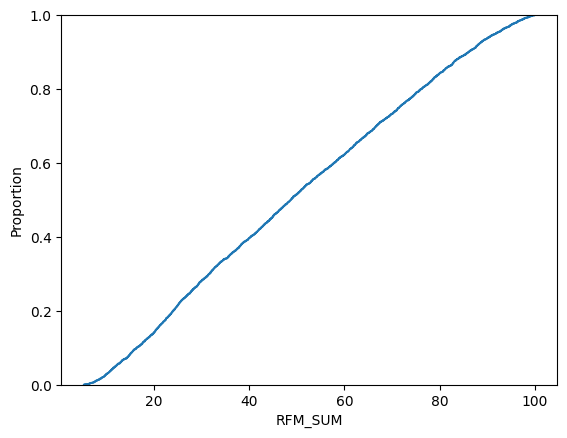

In [ ]:
sns.ecdfplot(data=RFM["RFM_SUM"])

The ECDF plot showcases an almost linear trend, suggesting an even distribution of customer loyalty scores. This indicates that the customer base is diverse, with nearly equal proportions across the loyalty spectrum. Retailers can utilize this data to create targeted marketing strategies for each loyalty segment.

In [ ]:
min(RFM["RFM_SUM"])

5.371999999999999

In [ ]:
max(RFM["RFM_SUM"])

99.92099999999999

The RFM_SUM scores of customers span from a low of 5.37 to a high of 99.92. This broad range underscores the diversity of the customer base in terms of their interactions (recency, frequency, and monetary value). Retailers should consider these scores when segmenting customers, ensuring that strategies are tailored to cater to both the low-scoring and high-scoring customer segments.

# Dynamic Customer Loyalty Segmentation Using RFM Score Quantiles

In [ ]:
def loyality(x, quant):
  if x <= quant[0.25]:
    return "silver"
  elif x <= quant[0.50]:
    return "Gold"
  elif x <= quant[0.75]:
    return "Diamond"
  else:
    return "Platinum"


In [ ]:
# Use the above function with quantiles passed as an argument
RFM["Loyality"] = RFM["RFM_SUM"].apply(lambda x: loyality(x, quant100))

In [ ]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807,Diamond
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021,Platinum
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973,Diamond
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107,Diamond
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387,silver


In [ ]:
RFM["Loyality"].value_counts()

Platinum    1085
silver      1085
Gold        1085
Diamond     1084
Name: Loyality, dtype: int64

**INSIGHTS:**
1. The loyalty segments are evenly distributed among the customer base due to quantile-based segmentation.
2. An equal distribution suggests a balanced customer engagement across all categories.
3. Businesses should assess if these quantile boundaries optimally represent customer behaviors and adjust marketing strategies accordingly.

# K-Means clustering

In [ ]:
Newdata=RFM["RFM_SUM"]
Newdata.head(2)

0    55.807
1    91.021
Name: RFM_SUM, dtype: float64

In [ ]:
Newdata=pd.DataFrame(Newdata)

In [ ]:
Newdata.head(2)

,RFM_SUM
0,55.807
1,91.021


# Elbow Method for Optimal Number of Clusters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
# Define a range of cluster numbers to test
n_clusters = range(2, 11)
inertia_values = []

In [ ]:
# Calculate inertia for each number of clusters
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(Newdata)
    inertia_values.append(kmeans.inertia_)


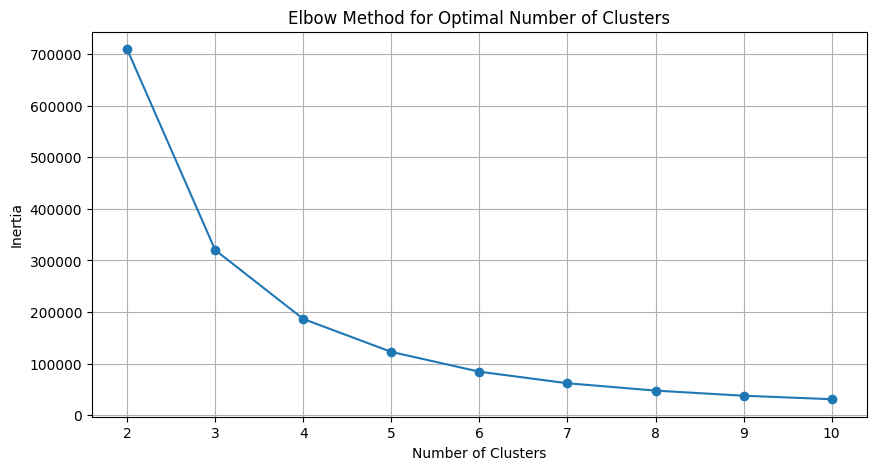

In [ ]:
# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

1. The inertia sharply decreases from 2 to around 4 clusters. After 4 clusters, the rate of decrease in inertia significantly slows down.

2. The "elbow" of the graph, which is the optimal number of clusters for K-Means, appears to be at 4.


# Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score


In [ ]:
# Define a range of cluster numbers to test
n_clusters = range(2, 11)
silhouette_scores = []

In [ ]:
# Fit K-means for each number of clusters and calculate silhouette score
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(Newdata)
    silhouette_avg = silhouette_score(Newdata, cluster_labels)
    silhouette_scores.append(silhouette_avg)


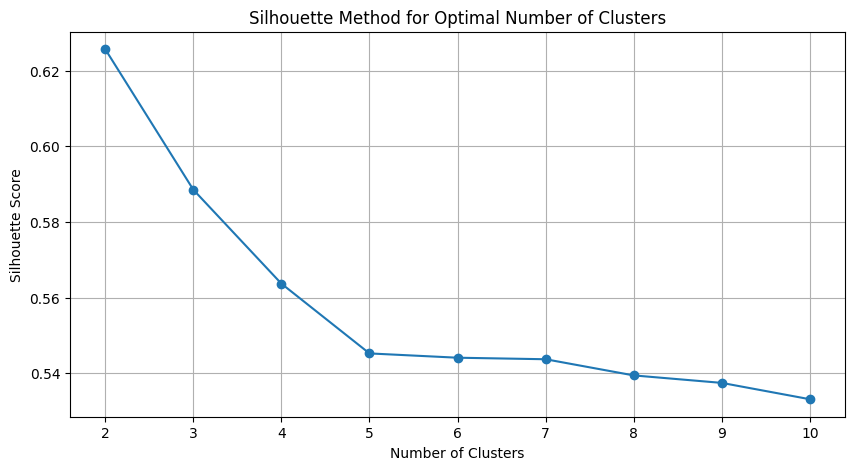

In [ ]:
# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


The silhouette score is highest when the number of clusters is 2.

The score sharply declines as the number of clusters increases from 2 to 4 and then continues to decrease at a steadier rate beyond 4 clusters.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans1=KMeans(max_iter=200,random_state=100,n_clusters=4)
y_means=kmeans1.fit_predict(Newdata)

In [ ]:
y_means

array([1, 3, 1, ..., 2, 3, 1], dtype=int32)

In [ ]:
RFM["Cluster"]=kmeans1.labels_
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,55.807,Diamond,1
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.021,Platinum,3
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,66.973,Diamond,1
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,58.107,Diamond,1
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.387,silver,0


In [ ]:
RFM["Cluster"].value_counts()

0    1235
2    1122
1    1030
3     952
Name: Cluster, dtype: int64

We observe that, Cluster 0 has the highest customer count, while Cluster 3 has the least. This segmentation aids in tailoring targeted marketing strategies for each group.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
labels=kmeans1.labels_
silhouette_score(Newdata,labels)

0.5633325208789345

The silhouette score obtained for our clustering is approximately 0.5633. Given that the silhouette score range is from -1 to +1, a score of 0.5633 indicates moderate clustering quality. The score suggests that clusters are reasonably apart from each other, with a fair cohesion within each cluster. The value being greater than 0.5 implies that the clustering is satisfactory, but there may still be some room for improvement.

# **2. Identify the business trend--day,month,season,timing**

In [ ]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
df_final1=df_final.copy()

In [ ]:
df_final1

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


In [ ]:
import datetime as dt

In [ ]:
df_final1["Day"]=df_final1["InvoiceDate"].dt.day_name()
df_final1["Month_name"]=df_final1["InvoiceDate"].dt.month_name()
df_final1["Month"]=df_final1["InvoiceDate"].dt.month
df_final1["Hour"]=df_final1["InvoiceDate"].dt.hour


In [ ]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month_name,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,December,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,December,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,December,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,December,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,December,12,8


In [ ]:
df_final1["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [ ]:
df_final1["Month"].value_counts()

11    2660
12    2179
10    1930
9     1757
5     1559
6     1394
7     1331
3     1324
8     1283
4     1153
2     1003
1      993
Name: Month, dtype: int64

In [ ]:
df_final1["Hour"].value_counts()

12    3133
13    2639
11    2279
14    2278
10    2230
15    2045
9     1395
16    1105
8      555
17     546
18     169
19     144
7       29
20      18
6        1
Name: Hour, dtype: int64

In [ ]:
def cal_season(x):
  if x in [10,11,12,1]:
    return "Winter"
  elif x in [2,3]:
    return "Spring"
  elif x in [4,5,6]:
    return "Summer"
  else:
    return "Monsoon"


In [ ]:
def cal_timing(x):
  if x in range(1,4):
    return "late night"
  elif x in range(4,12):
    return "Morning"
  elif x in range(12,16):
    return "Afternoon"
  else:
    return "Evening"


In [ ]:
df_final1["Season"]=df_final1["Month"].apply(cal_season)

In [ ]:
df_final1["Timing"]=df_final1["Hour"].apply(cal_timing)

In [ ]:
df_final1["Timing"].value_counts()

Afternoon    10095
Morning       6489
Evening       1982
Name: Timing, dtype: int64

In [ ]:
df_final1["Weekend"]=np.where((df_final1.Day=="Saturday")|(df_final1.Day=="Sunday"),"Weekend","Weekday")

In [ ]:
df_final1.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month_name,Month,Hour,Season,Timing,Weekend
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,December,12,8,Winter,Morning,Weekday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,December,12,8,Winter,Morning,Weekday


In [ ]:
# analysis of the no of invoice generated day wise

In [ ]:
day_count =df_final1.groupby("Day")["InvoiceNo"].count().to_frame("invoice_count").reset_index()

In [ ]:
day_count

,Day,invoice_count
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


In [ ]:
Season_count =df_final1.groupby("Season")["InvoiceNo"].count().to_frame("invoice_count").reset_index()

In [ ]:
Season_count

,Season,invoice_count
0,Monsoon,4371
1,Spring,2327
2,Summer,4106
3,Winter,7762


From our data analysis, the following key business trends have been observed:

1. **Daywise Activity**: The majority of invoices are generated on Thursdays, with Wednesday following close. It's also noted that there are no transactions on Saturdays.

2. **Monthly Breakdown**: November records the highest transactions, potentially hinting at pre-holiday shopping sprees.

3. **Operational Hours**: The business sees the most activity around noon, with minimal transactions in the early morning and late evening.

4. **Seasonal Insights**: Winter months (which include November and December) account for the highest transaction volumes, likely due to holiday shopping.

5. **Daily Timing**: The afternoon period registers the highest transaction numbers, followed by mornings.

6. **Weekend vs. Weekday**: Transactions predominantly occur on weekdays, with Saturday being an off day.

These insights suggest that the business peaks during weekdays, especially Thursdays in the winter months, around mid-day. Adjustments in staffing, inventory, and promotions during these peak times might further optimize business operations.



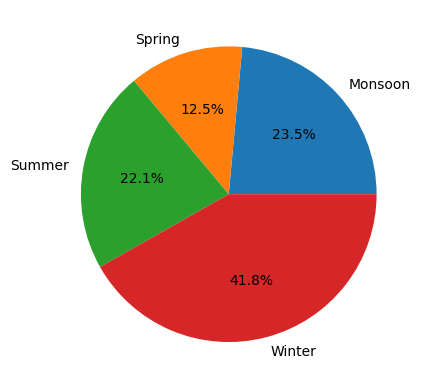

In [ ]:
plt.pie(Season_count.invoice_count,labels=Season_count.Season,autopct="%.1f%%")
plt.show()

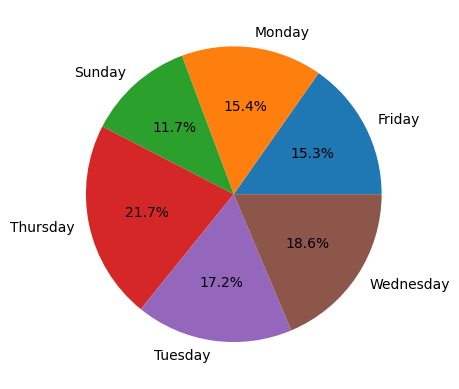

In [ ]:
plt.pie(day_count.invoice_count,labels=day_count.Day,autopct="%.1f%%")
plt.show()

# Based on the data analysis and visualizations:

1. Winter is the peak season for generating invoices, accounting for 41.8% of the total, suggesting a significant uptick in business during the colder months.
2. Thursday is the busiest day of the week with 21.7% of invoices, making it essential for optimal resource allocation.
3. Business remains consistent during the weekdays, with a slight dip on Sundays, while Saturdays are notably absent, indicating it's an off day.

Efforts to optimize business operations should focus on the winter season and particularly around mid-week for maximum efficiency and profit.

# **3. Recommendation Engine**

Recommendation systems enhance user experiences in areas from movies to online shopping. We explored:

1. **Collaborative Filtering**: Recommends items based on user behavior similarities. If user U likes movies A, C, D, and F, and another prefers A, C, D, and X, U gets suggested X and the other gets F.

2. **Content-Based Filtering**: Uses item features for recommendations. If a user enjoys 'action' movies, they're suggested similar genres.

3. **Hybrid Filtration**: A blend of the above two for more accurate suggestions.

For implementing a recommendation system using this dataset, considering **collaborative filtering** would involve using the 'CustomerID' to group purchases and find similarities in buying patterns among different customers. The 'Description' or 'StockCode' can be utilized for content-based filtering by understanding the features or tags related to each product.

In [ ]:
df100=original_data.copy()

In [ ]:
df100.head(5)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df100.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df100=df100.drop(["lower"],axis=1)

In [ ]:
df100=df100.dropna(axis=0)

In [ ]:
df100.shape

(406829, 8)

# Collaborative filtering approach

In [ ]:
custID_matrix=df100.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum")

In [ ]:
custID_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Using collaborative filtering, a pivot table was created mapping customer purchases to products. NaN values were replaced with 0. This matrix aids in determining product recommendations based on customer similarity.

In [ ]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)
custID_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Computing Customer Similarity using Cosine Similarity


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity=cosine_similarity(custID_matrix)

In [ ]:
similarity.shape

(4372, 4372)

In [ ]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
        0.01282789],
       [0.        , 0.06302187, 1.        , ..., 0.        , 0.17090475,
        0.08326911],
       ...,
       [0.        , 0.11377602, 0.        , ..., 1.        , 0.01780047,
        0.        ],
       [0.        , 0.10936441, 0.17090475, ..., 0.01780047, 1.        ,
        0.09633351],
       [0.        , 0.01282789, 0.08326911, ..., 0.        , 0.09633351,
        1.        ]])

In [ ]:
similarity[100]

array([0.        , 0.14481324, 0.08703883, ..., 0.0942809 , 0.18628514,
       0.1062988 ])

In [ ]:
sorted(similarity[100],reverse=True)

[0.9999999999999996,
 0.32688969261277073,
 0.27343962911259007,
 0.26903708365381973,
 0.26827744801910997,
 0.2629502940535667,
 0.25333333333333335,
 0.2527226527352203,
 0.24930009553630061,
 0.24930009553630061,
 0.24911966213168743,
 0.24870800168690355,
 0.24850429767895826,
 0.2461829819586655,
 0.24494897427831783,
 0.24221202832779937,
 0.2413346726900722,
 0.24071739063762815,
 0.24053511772118197,
 0.24019223070763074,
 0.23624164222061245,
 0.23333333333333336,
 0.23268467259951844,
 0.232379000772445,
 0.23165620275160329,
 0.23115869750961876,
 0.2307082566667037,
 0.2277339348846351,
 0.2276096821334301,
 0.22658813492955773,
 0.22566921470262752,
 0.2239171473757401,
 0.22259728109199708,
 0.22135943621178658,
 0.22000763928677075,
 0.21945205394367925,
 0.21543753928536533,
 0.21538744758532144,
 0.21486575084548035,
 0.21437688030314891,
 0.21398024625545647,
 0.21333333333333337,
 0.21329967236760186,
 0.2124429424543694,
 0.212267452202093,
 0.21192517713040704,
 0

In [ ]:
final=pd.DataFrame(similarity)

In [ ]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
final.columns=custID_matrix.index

In [ ]:
final

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4369,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4370,0.0,0.109364,0.170905,0.137124,0.044866,0.072870,0.0,0.113354,0.034204,0.093170,...,0.0,0.0,0.017102,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [ ]:
final=final.set_index(custID_matrix.index)

In [ ]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
final.loc[12347].sort_values(ascending=False)

CustomerID
12347.0    1.000000
17396.0    0.301694
13324.0    0.256186
13759.0    0.241355
16855.0    0.226050
             ...   
15049.0    0.000000
16965.0    0.000000
16963.0    0.000000
16961.0    0.000000
12346.0    0.000000
Name: 12347.0, Length: 4372, dtype: float64

In [ ]:
item_cust_A=set(custID_matrix.loc[12347].iloc[custID_matrix.loc[12347].to_numpy().nonzero()].index)


In [ ]:
len(item_cust_A)

103

In [ ]:
item_cust_B=set(custID_matrix.loc[17396].iloc[custID_matrix.loc[17396].to_numpy().nonzero()].index)

In [ ]:
len(item_cust_B)

24

In [ ]:
Recommended_item_cust_A=item_cust_B-item_cust_A

In [ ]:
Recommended_item_cust_A

{22141, 22142, 22144, 22191, 22192, 22193, 22730, 23245, 'M'}

This approach enables the identification of how similar any two customers are in terms of their purchasing patterns or any other metric represented by custID_matrix. This can be particularly useful for personalized marketing, recommendation systems, or customer segmentation.


# **4. Finding the lifetime valuation of customer**

In [ ]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [ ]:
df200=RFM_score.copy()

In [ ]:
df200["avg_order_value"]=df200["Monetary"]/df200["Frequency"]

In [ ]:
df200.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,avg_order_value
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,77183.600000
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,615.714286
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,449.310000
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,1757.550000
4,12350.0,310,1,334.40,227.5,746.5,1230.0,334.400000


In [ ]:
sum(df200["Frequency"])

18566

In [ ]:
purchase_frequency=sum(df200['Frequency'])/df200.shape[0]

In [ ]:
purchase_frequency

4.278866098179304

In [ ]:
Repeat_rate=df200[df200["Frequency"]>1].shape[0]/df200.shape[0]

In [ ]:
Repeat_rate

0.6561419681954367

In [ ]:
churn_rate=1-Repeat_rate


In [ ]:
churn_rate

0.3438580318045633

In [ ]:
df200["profit_margin"]=df200["Monetary"]*0.20
# customer_value

In [ ]:
df200.head(2)

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,avg_order_value,profit_margin
0,12346.0,325,1,77183.6,162.5,746.5,4330.0,77183.600000,15436.72
1,12347.0,2,7,4310.0,4156.5,3709.5,4004.0,615.714286,862.00


In [ ]:
df200["cltv"]=df200["avg_order_value"]*purchase_frequency/churn_rate

In [ ]:
df200.head(2)

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,avg_order_value,profit_margin,cltv
0,12346.0,325,1,77183.6,162.5,746.5,4330.0,77183.600000,15436.72,960449.542627
1,12347.0,2,7,4310.0,4156.5,3709.5,4004.0,615.714286,862.00,7661.763692


Delving deeper into the provided output, here are some insights with the accompanying figures:

1. Average Order Value (AOV): This metric is calculated by dividing the total monetary value by the frequency of orders. For example, Customer 12346.0 has an AOV of 77,183.60, suggesting a significant spending capacity.

2. Purchase Frequency: The average number of orders per customer is 4.2789. This figure indicates how often an average customer makes a purchase.

3. Repeat Rate: 65.61% of customers have ordered more than once, highlighting a majority of returning customers.

4. Churn Rate: The churn rate is 34.38%, representing the proportion of customers who may not have returned to make a subsequent purchase.

5. Profit Margin: 20% of the monetary value is considered as the profit margin. For instance, Customer 12346.0 contributes a profit of 15,436.72.

6. Customer Life Time Value (CLTV): This is a projection of how much a customer is expected to contribute in revenue over their lifespan as a customer. For Customer 12346.0, the CLTV is an impressive 960,449.54, while for Customer 12347.0 it is 7,661.76.

In summary, the data highlights the potential profitability of each customer, with some customers like 12346.0 having a substantially higher projected lifetime value, making them crucial for targeted marketing and retention strategies.

# **CONCLUSION**:


1. RFM Analysis & Significance:
Our journey began with the RFM (Recency, Frequency, Monetary) model, an essential method in customer segmentation. This approach facilitates a granular understanding of customer behavior, allowing businesses to categorize their clientele based on purchasing patterns.

a. Recency: Indicates the freshness of customer engagement. A lower recency score suggests a recently active customer, which can be a potent signal for retention strategies.

b. Frequency: Reflects how often a customer makes a purchase. High frequency hints at loyal customers.

c. Monetary: Demonstrates the total monetary expenditure by the customer. High monetary values signify potentially high-value customers.

2. Key Metrics & Insights:

a. Average Order Value (AOV): By assessing the AOV, we can gauge the average spending pattern of customers. For instance, customer 12346.0's impressive AOV of 77183.60 hints at them being a high spender, potentially falling in the 'premium' segment.

b. Purchase Frequency: An average purchase frequency of approximately 4.28 suggests that a typical customer shops around four times. This frequency is crucial for planning inventory and forecasting sales.

c. Repeat Rate & Churn: A repeat rate of 65.61% is a testament to a substantial loyal customer base. However, a churn rate of 34.39% indicates room for improvement in customer retention strategies.

d. Customer Lifetime Value (CLTV): The CLTV provides a projection of a customer's monetary contribution over their entire relationship. A higher CLTV, like that of customer 12346.0 (~960449.54), signals customers that are exceptionally valuable for the business.

3. Profit Margins:

The application of a standard profit margin (20%) on the monetary value offers an approximate figure on the profitability derived from each customer.

4. Significance & Highlights:

a. Data-Driven Decision Making: This analysis empowers businesses with data-driven insights, enabling them to make informed decisions regarding marketing, sales, and customer engagement strategies.

b. Tailored Marketing & Promotions: With clear customer segments, businesses can tailor promotions and marketing campaigns to target specific customer groups, maximizing ROI.

c. Customer Retention: Understanding metrics like churn rate can help businesses devise strategies to improve customer loyalty, directly impacting profitability.

# **Recommendations**:

1. Targeted Marketing: Use RFM segments to devise tailored marketing strategies. High-value customers might respond well to exclusive offers or loyalty programs.

2. Retention Strategies: Address the observed churn rate by implementing robust customer engagement and retention programs, possibly leveraging personalized email campaigns or exclusive discounts for repeat purchases.

3. Feedback Loop: Engage with customers who have high recency values to understand potential reasons for their inactivity. Feedback can offer actionable insights to reduce churn.

4. Upselling Opportunities: Leverage AOV and CLTV metrics to identify customers primed for upselling or cross-selling opportunities.

In essence, the RFM analysis, combined with additional derived metrics, provides a holistic view of customer behavior, value, and potential. Implementing strategies based on these insights can drastically improve customer engagement, loyalty, and overall business profitability.
